# Reference States

Below are notes from each section of the qiskit course documentation found on this page: https://learn.qiskit.org/course/algorithm-design/reference

## Default state

A _reference state_ is the initial fixed start of our circuit. The simplest starting point for our circuit/algorithm is the default for many quantum computers, $\ket{0}^{\otimes n}$. However, in cases where we have some datapoint or clue for a better starting position $\ket{\rho}$ that will cause faster convergence, we can apply a unitary operator (non-parameterized), $U_R$ that will prepare that state. 

In the simple case, our unitary operator $U_R$ is the identity operator.

## Classical reference state

If we start with 3 qubits, we could prepare an initial state to be $\ket{001}$ by just applying an $X$ gate on the first qubit. However, this is an example of a purely classical reference state.

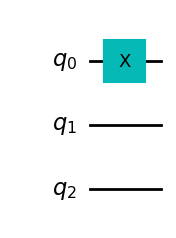

In [1]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(3)
qc.x(0)

qc.draw("mpl")

## Quantum reference state

Now instead, we can create a reference state that is more complex and _quantum_ by adding in superposition and entanglement, such as $\frac{1}{\sqrt{2}}(\ket{100} + \ket{111})$. We can prepare such a state as shown below:

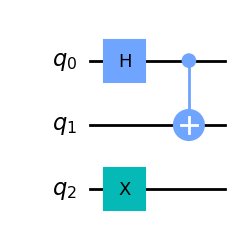

In [2]:
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, 1)
qc.x(2)

qc.draw("mpl")

## Constructing reference states using template circuits

Reference states can also be created using template circuits from Qiskit given the parameter values for the gates. One example template circuit is TwoLocal, which is shown below: 

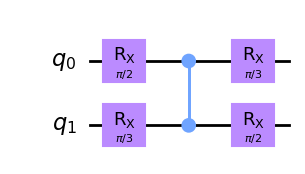

In [3]:
from qiskit.circuit.library import TwoLocal
from math import pi

reference_circuit = TwoLocal(2, "rx", "cz", entanglement="linear", reps=1)
theta_list = [pi / 2, pi / 3, pi / 3, pi / 2]

reference_circuit = reference_circuit.bind_parameters(theta_list)

reference_circuit.decompose().draw("mpl")

<font color="red">Question:</font> The course stated that you can start in all 0 state (default) or some specific state, $\ket{\rho}$ based on some datapoint or educated guess about a good starting position which would require some specific unitary operator to prepare. But the TwoLocal seems difference from those 2 use cases since its a tunable, parameterized circuit. Isn't that what the variational form is supposed to do? Why would we parameterize the reference state AND the variational form, especially since the course specifically said the reference state was _not_ parameterized? I understand that this is just an easy way for a user to get a bunch of different reference points they can use but it seems kind of weird.

## Application-specific reference states

### Quantum Chemistry

In Quantum Chemistry, the _Hartree-Fock_ state is an approximation of the ground state of an atom or molecule. Given the goal of creating a variational algorithm to find the exact ground state, we can use this known classical approximation as a reference state to help our algorithm converge faster.

<font color="red">Question: </font>I thought that one of the successes of quantum mechanics was its ability to predict the energy levels (eigenvalues) of any quantum system containing one or more particles. So why do we need a variational algorithm to find the exact ground state? I thought the point was that we knew what the theoretical lowest energy was and we were interesting in finding a unitary operator (variational form) that would transform a given input into the lowest energy or a value closest to our theoretical lower bounds as possible?

In [ ]:
from qiskit_nature.second_q.circuit.library import HartreeFock
from qiskit_nature.second_q.mappers import JordanWignerMapper

num_spatial_orbitals = 2
num_particles = (1, 1)

mapper = JordanWignerMapper()

h2_reference_state = HartreeFock(
    num_spatial_orbitals=num_spatial_orbitals,
    num_particles=num_particles,
    qubit_mapper=mapper,
)

h2_reference_state.decompose().draw("mpl")

Example with Lithium hydride (LiH):

In [ ]:
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.circuit.library import HartreeFock
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_nature.second_q.formats.molecule_info import MoleculeInfo

molecule = MoleculeInfo(
    # Coordinates in Angstrom
    symbols=["Li", "H"],
    coords=([0.0, 0.0, 0.0], [0.2, 0.0, 0.0]),
    multiplicity=1,  # = 2*spin + 1
    charge=0,
)

driver = PySCFDriver.from_molecule(molecule)
LiH_problem = driver.run()

mapper = JordanWignerMapper()
LiH_reference_state = HartreeFock(
    num_spatial_orbitals=LiH_problem.num_spatial_orbitals,
    num_particles=LiH_problem.num_particles,
    qubit_mapper=mapper,
)

LiH_reference_state.decompose().draw("mpl")

### Quantum Machine Learning

Variational quantum classifiers (VQC) take training data and encode it into a quantum state with a parameterized circuit known as a feature map where each parameter value represents a data point from the training dataset. Thus given the number of features, a circuit template can be designed to have that many gates that take some parameter for the rotation or phase it applies. Then the specific transformation is based on each classical datapoint's features which transform/encode it to a specific quantum state. One example of how to do this is to use Qiskit's ZZFeatureMap.

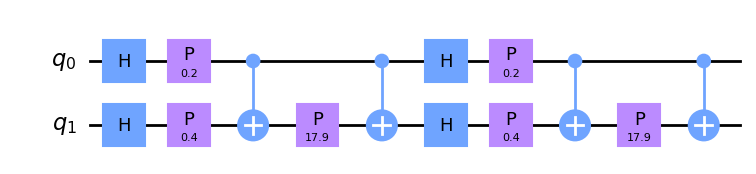

In [5]:
from qiskit.circuit.library import ZZFeatureMap

data = [0.1, 0.2]

zz_feature_map_reference = ZZFeatureMap(feature_dimension=2, reps=2)
zz_feature_map_reference = zz_feature_map_reference.bind_parameters(data)
zz_feature_map_reference.decompose().draw("mpl")

<font color="red">Question: </font>Is there a way to encode _all_ the data together such that a circuit will transform all inputs at the same time? This is similar to how Grover's, Deutch-Jozsa, Shor's algorithms worked. The above seems like you have to run the circuit one per datapoint instead.

Overall, even though Qiskit introduced classes that built some parameterized, tunable circuits, this should be for ease on the user; reference states are meant to be fixed, initial starting points.